In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.test.gpu_device_name()

1.12.0


'/device:GPU:0'

In [2]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
config = tf.ConfigProto(log_device_placement=True)
config.graph_options.optimizer_options.global_jit_level = tf.OptimizerOptions.ON_1
sess = tf.Session(config=config)
# Runs the op.
print(sess.run(c))

"""
 NOTE : As of TF 1.12.0, you will need CUDA 9.2 (9.0 will give a driver warning) and CUDNN 7.2.1 to use the pip installed package. I've heard the devs say you can compile CUDA 10 from source.
You should see the following output:

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K40c, pci bus
id: 0000:05:00.0
b: /job:localhost/replica:0/task:0/device:GPU:0
a: /job:localhost/replica:0/task:0/device:GPU:0
MatMul: /job:localhost/replica:0/task:0/device:GPU:0
[[ 22.  28.]
 [ 49.  64.]]
"""


[[22. 28.]
 [49. 64.]]


"\n NOTE : As of TF 1.12.0, you will need CUDA 9.2 (9.0 will give a driver warning) and CUDNN 7.2.1 to use the pip installed package. I've heard the devs say you can compile CUDA 10 from source.\nYou should see the following output:\n\nDevice mapping:\n/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K40c, pci bus\nid: 0000:05:00.0\nb: /job:localhost/replica:0/task:0/device:GPU:0\na: /job:localhost/replica:0/task:0/device:GPU:0\nMatMul: /job:localhost/replica:0/task:0/device:GPU:0\n[[ 22.  28.]\n [ 49.  64.]]\n"

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


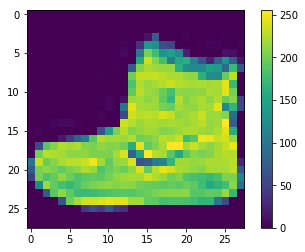

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0


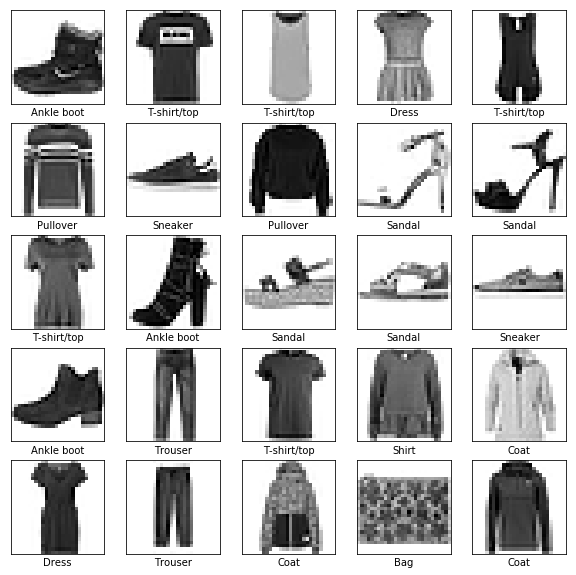

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
   32/60000 [..............................] - ETA: 4:50 - loss: 2.4497 - acc: 0.0938

 1696/60000 [..............................] - ETA: 7s - loss: 1.1442 - acc: 0.6073  

 2720/60000 [>.............................] - ETA: 5s - loss: 0.9922 - acc: 0.6574

 4320/60000 [=>............................] - ETA: 3s - loss: 0.8825 - acc: 0.6963

 5952/60000 [=>............................] - ETA: 3s - loss: 0.8061 - acc: 0.7209

 7712/60000 [==>...........................] - ETA: 2s - loss: 0.7571 - acc: 0.7360

 9504/60000 [===>..........................] - ETA: 2s - loss: 0.7167 - acc: 0.7506

11296/60000 [====>.........................] - ETA: 2s - loss: 0.6891 - acc: 0.7610

12896/60000 [=====>........................] - ETA: 2s - loss: 0.6692 - acc: 0.7668

14688/60000 [======>.......................] - ETA: 1s - loss: 0.6479 - acc: 0.7731

16512/60000 [=======>......................] - ETA: 1s - loss: 0.6290 - acc: 0.7802

18368/60000 [========>.....................] - ETA: 1s - loss: 0.6152 - acc: 0.7845

20320/60000 [=========>....................] - ETA: 1s - loss: 0.6046 - acc: 0.7878

22144/60000 [==========>...................] - ETA: 1s - loss: 0.5961 - acc: 0.7914

23872/60000 [==========>...................] - ETA: 1s - loss: 0.5882 - acc: 0.7946

25664/60000 [===========>..................] - ETA: 1s - loss: 0.5798 - acc: 0.7976

27488/60000 [============>.................] - ETA: 1s - loss: 0.5738 - acc: 0.7997

29344/60000 [=============>................] - ETA: 1s - loss: 0.5640 - acc: 0.8031

31040/60000 [==============>...............] - ETA: 0s - loss: 0.5585 - acc: 0.8048

32864/60000 [===============>..............] - ETA: 0s - loss: 0.5523 - acc: 0.8068

34752/60000 [================>.............] - ETA: 0s - loss: 0.5467 - acc: 0.8086

36608/60000 [=================>............] - ETA: 0s - loss: 0.5397 - acc: 0.8112

38432/60000 [==================>...........] - ETA: 0s - loss: 0.5350 - acc: 0.8128

40320/60000 [===================>..........] - ETA: 0s - loss: 0.5301 - acc: 0.8141

42240/60000 [====================>.........] - ETA: 0s - loss: 0.5261 - acc: 0.8153

44096/60000 [=====================>........] - ETA: 0s - loss: 0.5225 - acc: 0.8164

46016/60000 [======================>.......] - ETA: 0s - loss: 0.5188 - acc: 0.8175

47840/60000 [======================>.......] - ETA: 0s - loss: 0.5148 - acc: 0.8188

49760/60000 [=======================>......] - ETA: 0s - loss: 0.5109 - acc: 0.8203

51552/60000 [========================>.....] - ETA: 0s - loss: 0.5100 - acc: 0.8207

53408/60000 [=========================>....] - ETA: 0s - loss: 0.5080 - acc: 0.8211

55296/60000 [==========================>...] - ETA: 0s - loss: 0.5047 - acc: 0.8221

57152/60000 [===========================>..] - ETA: 0s - loss: 0.5014 - acc: 0.8233

59072/60000 [============================>.] - ETA: 0s - loss: 0.4986 - acc: 0.8243

60000/60000 [==============================] - 2s 31us/step - loss: 0.4974 - acc: 0.8246


Epoch 2/5
   32/60000 [..............................] - ETA: 4s - loss: 0.4060 - acc: 0.7812

 1696/60000 [..............................] - ETA: 1s - loss: 0.3579 - acc: 0.8703

 3552/60000 [>.............................] - ETA: 1s - loss: 0.3675 - acc: 0.8688

 5088/60000 [=>............................] - ETA: 1s - loss: 0.3900 - acc: 0.8599

 6720/60000 [==>...........................] - ETA: 1s - loss: 0.3890 - acc: 0.8607

 8320/60000 [===>..........................] - ETA: 1s - loss: 0.3844 - acc: 0.8631

 9888/60000 [===>..........................] - ETA: 1s - loss: 0.3810 - acc: 0.8647

11264/60000 [====>.........................] - ETA: 1s - loss: 0.3795 - acc: 0.8652

13152/60000 [=====>........................] - ETA: 1s - loss: 0.3751 - acc: 0.8649

14976/60000 [======>.......................] - ETA: 1s - loss: 0.3792 - acc: 0.8622

16736/60000 [=======>......................] - ETA: 1s - loss: 0.3804 - acc: 0.8619

18656/60000 [========>.....................] - ETA: 1s - loss: 0.3831 - acc: 0.8610

20512/60000 [=========>....................] - ETA: 1s - loss: 0.3798 - acc: 0.8623

22400/60000 [==========>...................] - ETA: 1s - loss: 0.3803 - acc: 0.8620

24288/60000 [===========>..................] - ETA: 1s - loss: 0.3798 - acc: 0.8624

26080/60000 [============>.................] - ETA: 0s - loss: 0.3788 - acc: 0.8626

27840/60000 [============>.................] - ETA: 0s - loss: 0.3781 - acc: 0.8632

29216/60000 [=============>................] - ETA: 0s - loss: 0.3765 - acc: 0.8636

31072/60000 [==============>...............] - ETA: 0s - loss: 0.3765 - acc: 0.8644

32928/60000 [===============>..............] - ETA: 0s - loss: 0.3777 - acc: 0.8638

34848/60000 [================>.............] - ETA: 0s - loss: 0.3796 - acc: 0.8633

36576/60000 [=================>............] - ETA: 0s - loss: 0.3792 - acc: 0.8635

38432/60000 [==================>...........] - ETA: 0s - loss: 0.3812 - acc: 0.8631

40288/60000 [===================>..........] - ETA: 0s - loss: 0.3802 - acc: 0.8634

42112/60000 [====================>.........] - ETA: 0s - loss: 0.3804 - acc: 0.8633

43904/60000 [====================>.........] - ETA: 0s - loss: 0.3802 - acc: 0.8633

45376/60000 [=====================>........] - ETA: 0s - loss: 0.3795 - acc: 0.8634

47008/60000 [======================>.......] - ETA: 0s - loss: 0.3787 - acc: 0.8639

48800/60000 [=======================>......] - ETA: 0s - loss: 0.3772 - acc: 0.8644

50720/60000 [========================>.....] - ETA: 0s - loss: 0.3766 - acc: 0.8645

52512/60000 [=========================>....] - ETA: 0s - loss: 0.3768 - acc: 0.8642

54400/60000 [==========================>...] - ETA: 0s - loss: 0.3758 - acc: 0.8646

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3752 - acc: 0.8648

58176/60000 [============================>.] - ETA: 0s - loss: 0.3739 - acc: 0.8652

60000/60000 [==============================] - 2s 29us/step - loss: 0.3739 - acc: 0.8651


Epoch 3/5
   32/60000 [..............................] - ETA: 5s - loss: 0.1929 - acc: 0.9375

 1792/60000 [..............................] - ETA: 1s - loss: 0.3646 - acc: 0.8644

 3680/60000 [>.............................] - ETA: 1s - loss: 0.3645 - acc: 0.8696

 5568/60000 [=>............................] - ETA: 1s - loss: 0.3597 - acc: 0.8716

 7488/60000 [==>...........................] - ETA: 1s - loss: 0.3518 - acc: 0.8735

 9248/60000 [===>..........................] - ETA: 1s - loss: 0.3574 - acc: 0.8714

11200/60000 [====>.........................] - ETA: 1s - loss: 0.3507 - acc: 0.8737

13024/60000 [=====>........................] - ETA: 1s - loss: 0.3528 - acc: 0.8731

14816/60000 [======>.......................] - ETA: 1s - loss: 0.3526 - acc: 0.8724

16608/60000 [=======>......................] - ETA: 1s - loss: 0.3518 - acc: 0.8717

18432/60000 [========>.....................] - ETA: 1s - loss: 0.3471 - acc: 0.8736

20096/60000 [=========>....................] - ETA: 1s - loss: 0.3459 - acc: 0.8738

21984/60000 [=========>....................] - ETA: 1s - loss: 0.3432 - acc: 0.8747

23808/60000 [==========>...................] - ETA: 0s - loss: 0.3423 - acc: 0.8751

25600/60000 [===========>..................] - ETA: 0s - loss: 0.3405 - acc: 0.8757

27424/60000 [============>.................] - ETA: 0s - loss: 0.3405 - acc: 0.8757

29344/60000 [=============>................] - ETA: 0s - loss: 0.3407 - acc: 0.8755

31168/60000 [==============>...............] - ETA: 0s - loss: 0.3428 - acc: 0.8750

33024/60000 [===============>..............] - ETA: 0s - loss: 0.3431 - acc: 0.8752

34880/60000 [================>.............] - ETA: 0s - loss: 0.3424 - acc: 0.8752

36800/60000 [=================>............] - ETA: 0s - loss: 0.3414 - acc: 0.8759

38624/60000 [==================>...........] - ETA: 0s - loss: 0.3399 - acc: 0.8765

40384/60000 [===================>..........] - ETA: 0s - loss: 0.3395 - acc: 0.8764

42048/60000 [====================>.........] - ETA: 0s - loss: 0.3394 - acc: 0.8765

43936/60000 [====================>.........] - ETA: 0s - loss: 0.3388 - acc: 0.8769

45600/60000 [=====================>........] - ETA: 0s - loss: 0.3384 - acc: 0.8768

47392/60000 [======================>.......] - ETA: 0s - loss: 0.3400 - acc: 0.8758

49216/60000 [=======================>......] - ETA: 0s - loss: 0.3385 - acc: 0.8764

51104/60000 [========================>.....] - ETA: 0s - loss: 0.3372 - acc: 0.8769

52800/60000 [=========================>....] - ETA: 0s - loss: 0.3375 - acc: 0.8770

54624/60000 [==========================>...] - ETA: 0s - loss: 0.3376 - acc: 0.8769

56288/60000 [===========================>..] - ETA: 0s - loss: 0.3376 - acc: 0.8771

58080/60000 [============================>.] - ETA: 0s - loss: 0.3374 - acc: 0.8770

59904/60000 [============================>.] - ETA: 0s - loss: 0.3369 - acc: 0.8775

60000/60000 [==============================] - 2s 28us/step - loss: 0.3368 - acc: 0.8775


Epoch 4/5
   32/60000 [..............................] - ETA: 4s - loss: 0.2865 - acc: 0.9375

 1792/60000 [..............................] - ETA: 1s - loss: 0.3130 - acc: 0.8817

 3584/60000 [>.............................] - ETA: 1s - loss: 0.3119 - acc: 0.8848

 5440/60000 [=>............................] - ETA: 1s - loss: 0.3083 - acc: 0.8846

 7264/60000 [==>...........................] - ETA: 1s - loss: 0.3091 - acc: 0.8845

 9152/60000 [===>..........................] - ETA: 1s - loss: 0.3054 - acc: 0.8853

10944/60000 [====>.........................] - ETA: 1s - loss: 0.3036 - acc: 0.8863

12896/60000 [=====>........................] - ETA: 1s - loss: 0.3073 - acc: 0.8853

14592/60000 [======>.......................] - ETA: 1s - loss: 0.3053 - acc: 0.8872

16480/60000 [=======>......................] - ETA: 1s - loss: 0.3051 - acc: 0.8880

18304/60000 [========>.....................] - ETA: 1s - loss: 0.3079 - acc: 0.8861

20160/60000 [=========>....................] - ETA: 1s - loss: 0.3081 - acc: 0.8872

21984/60000 [=========>....................] - ETA: 1s - loss: 0.3083 - acc: 0.8875

23904/60000 [==========>...................] - ETA: 0s - loss: 0.3085 - acc: 0.8872

25728/60000 [===========>..................] - ETA: 0s - loss: 0.3083 - acc: 0.8875

27456/60000 [============>.................] - ETA: 0s - loss: 0.3081 - acc: 0.8877

29280/60000 [=============>................] - ETA: 0s - loss: 0.3083 - acc: 0.8876

31040/60000 [==============>...............] - ETA: 0s - loss: 0.3082 - acc: 0.8879

32896/60000 [===============>..............] - ETA: 0s - loss: 0.3076 - acc: 0.8877

34816/60000 [================>.............] - ETA: 0s - loss: 0.3090 - acc: 0.8870

36608/60000 [=================>............] - ETA: 0s - loss: 0.3097 - acc: 0.8866

38528/60000 [==================>...........] - ETA: 0s - loss: 0.3105 - acc: 0.8866

40000/60000 [===================>..........] - ETA: 0s - loss: 0.3109 - acc: 0.8865

41952/60000 [===================>..........] - ETA: 0s - loss: 0.3125 - acc: 0.8858

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3137 - acc: 0.8853

45696/60000 [=====================>........] - ETA: 0s - loss: 0.3143 - acc: 0.8849

47456/60000 [======================>.......] - ETA: 0s - loss: 0.3141 - acc: 0.8850

49376/60000 [=======================>......] - ETA: 0s - loss: 0.3143 - acc: 0.8853

51168/60000 [========================>.....] - ETA: 0s - loss: 0.3139 - acc: 0.8855

53024/60000 [=========================>....] - ETA: 0s - loss: 0.3135 - acc: 0.8855

54848/60000 [==========================>...] - ETA: 0s - loss: 0.3124 - acc: 0.8861

56704/60000 [===========================>..] - ETA: 0s - loss: 0.3125 - acc: 0.8861

58560/60000 [============================>.] - ETA: 0s - loss: 0.3120 - acc: 0.8861

60000/60000 [==============================] - 2s 28us/step - loss: 0.3129 - acc: 0.8857


Epoch 5/5
   32/60000 [..............................] - ETA: 3s - loss: 0.3178 - acc: 0.8750

 1760/60000 [..............................] - ETA: 1s - loss: 0.2845 - acc: 0.8920

 3648/60000 [>.............................] - ETA: 1s - loss: 0.2930 - acc: 0.8884

 5408/60000 [=>............................] - ETA: 1s - loss: 0.2937 - acc: 0.8900

 7232/60000 [==>...........................] - ETA: 1s - loss: 0.2980 - acc: 0.8887

 9056/60000 [===>..........................] - ETA: 1s - loss: 0.2968 - acc: 0.8889

10944/60000 [====>.........................] - ETA: 1s - loss: 0.2977 - acc: 0.8882

12640/60000 [=====>........................] - ETA: 1s - loss: 0.2970 - acc: 0.8887

14368/60000 [======>.......................] - ETA: 1s - loss: 0.2980 - acc: 0.8874

16160/60000 [=======>......................] - ETA: 1s - loss: 0.2973 - acc: 0.8877

18048/60000 [========>.....................] - ETA: 1s - loss: 0.2964 - acc: 0.8883

19840/60000 [========>.....................] - ETA: 1s - loss: 0.3007 - acc: 0.8872

21728/60000 [=========>....................] - ETA: 1s - loss: 0.3004 - acc: 0.8862

23552/60000 [==========>...................] - ETA: 1s - loss: 0.3006 - acc: 0.8859

25440/60000 [===========>..................] - ETA: 0s - loss: 0.3019 - acc: 0.8855

27264/60000 [============>.................] - ETA: 0s - loss: 0.3006 - acc: 0.8860

29088/60000 [=============>................] - ETA: 0s - loss: 0.3003 - acc: 0.8866

30880/60000 [==============>...............] - ETA: 0s - loss: 0.2979 - acc: 0.8877

32800/60000 [===============>..............] - ETA: 0s - loss: 0.2976 - acc: 0.8883

34688/60000 [================>.............] - ETA: 0s - loss: 0.2965 - acc: 0.8890

36640/60000 [=================>............] - ETA: 0s - loss: 0.2970 - acc: 0.8888

38464/60000 [==================>...........] - ETA: 0s - loss: 0.2950 - acc: 0.8894

40416/60000 [===================>..........] - ETA: 0s - loss: 0.2939 - acc: 0.8898

42080/60000 [====================>.........] - ETA: 0s - loss: 0.2932 - acc: 0.8900

43904/60000 [====================>.........] - ETA: 0s - loss: 0.2941 - acc: 0.8896

45696/60000 [=====================>........] - ETA: 0s - loss: 0.2943 - acc: 0.8897

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2940 - acc: 0.8897

49472/60000 [=======================>......] - ETA: 0s - loss: 0.2933 - acc: 0.8900

51328/60000 [========================>.....] - ETA: 0s - loss: 0.2938 - acc: 0.8900

53152/60000 [=========================>....] - ETA: 0s - loss: 0.2935 - acc: 0.8903

54880/60000 [==========================>...] - ETA: 0s - loss: 0.2935 - acc: 0.8902

56768/60000 [===========================>..] - ETA: 0s - loss: 0.2930 - acc: 0.8904

58592/60000 [============================>.] - ETA: 0s - loss: 0.2931 - acc: 0.8904

60000/60000 [==============================] - 2s 28us/step - loss: 0.2927 - acc: 0.8908


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

   32/10000 [..............................] - ETA: 11s

 3360/10000 [=========>....................] - ETA: 0s 

 6496/10000 [==================>...........] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 0s 20us/step


Test accuracy: 0.8766


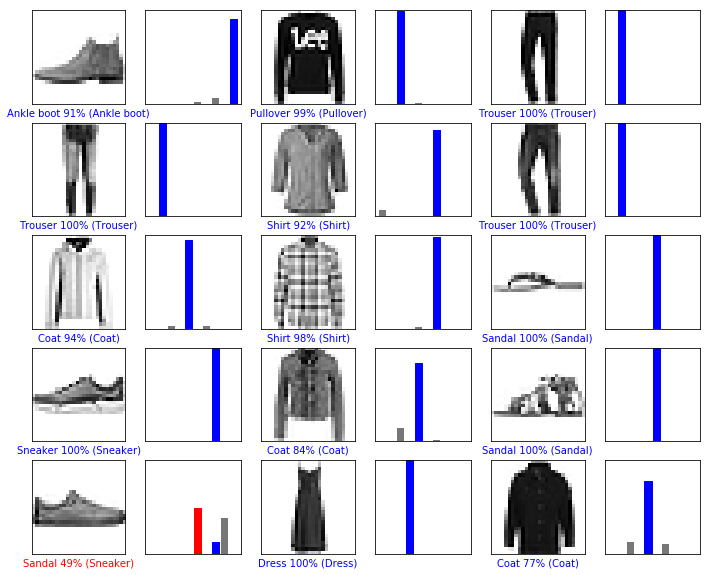

In [11]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)